# Create necessary framework

## Create the necessary training data 

In [48]:
library(tidyverse)
library(car)
library(olsrr)

In [2]:
# Make sure to change this
setwd("/home/yeachan153/Desktop/BDS/R/Big Data Analytics/Big-Data-Analytics/Text Analytics Project")

" 
Read in the CSV file
"
personality = as.tibble(read.csv("youtube-personality/YouTube-Personality-Personality_impression_scores_train.csv", 
                                 encoding = "UTF-8",
                                 sep = " "))

gender = as.tibble(read.csv("youtube-personality/YouTube-Personality-gender.csv",
                            encoding = "UTF-8",
                            sep = " "))

audiovisual = as.tibble(read.csv("youtube-personality/YouTube-Personality-audiovisual_features.csv",
                                 encoding = "UTF-8",
                                 sep = " "))

transcripts = as.tibble(read.csv("youtube-personality/transcripts.csv",
                                 encoding = "UTF-8",
                                 sep = ","))

transcripts$index = as.character(transcripts$index)

transcripts =
  transcripts %>%
  rename(vlogId = index,
         transcript = X0) %>%
  mutate(vlogId = substr(vlogId, 1, nchar(vlogId)-4))

personality$vlogId = as.character(personality$vlogId)
gender$vlogId = as.character(gender$vlogId)
audiovisual$vlogId = as.character(audiovisual$vlogId)

training_data = 
  personality %>%
  left_joiinstall.packages('olsrr'n(gender, on = c("vlogID" = "vlogID")) %>%
  left_join(audiovisual, on = c("vlogID" = "vlogID")) %>%
  left_join(transcripts, on = c("clogID" = "vlogID"))

#predictors based on transcripts

#establish wordcount function
wordcount <- function(vector_string,path_txt_file, sep)
{
  library(stringr)
  wordlist <- as.vector(colnames(read.csv(path_txt_file,sep=sep)))
  
  count_vector <- vector(length = length(vector_string))
  
  for (j in 1:length(vector_string))
  {
    sum <- 0
    for (i in 1:length(wordlist))
    {
      sum <- sum + str_count(vector_string[j],wordlist[i])
    }
    count_vector[j] <- sum
  }
  return(count_vector)
}

#relative frequency of words associated with Big Five (input library can be modified)
training_data$words_Extraversion <- wordcount(training_data$transcript, "words E.txt", sep = ",") / str_count(training_data$transcript)
training_data$words_Neuroticism <- wordcount(training_data$transcript, "words N.txt", sep = ",") / str_count(training_data$transcript)
training_data$words_Openness <- wordcount(training_data$transcript, "words O.txt", sep = ",") / str_count(training_data$transcript)
training_data$words_Agreeableness <- wordcount(training_data$transcript, "words A.txt", sep = ",") / str_count(training_data$transcript)
training_data$words_Conscientiousness <- wordcount(training_data$transcript, "words C.txt", sep = ",") / str_count(training_data$transcript)

training_data$words_nExtraversion <- wordcount(training_data$transcript, "words negative E.txt", sep = ",") / str_count(training_data$transcript)
training_data$words_nNeuroticism <- wordcount(training_data$transcript, "words negative N.txt", sep = ",") / str_count(training_data$transcript)
training_data$words_nOpenness <- wordcount(training_data$transcript, "words negative O.txt", sep = ",") / str_count(training_data$transcript)
training_data$words_nAgreeableness <- wordcount(training_data$transcript, "words negative A.txt", sep = ",") / str_count(training_data$transcript)
training_data$words_nConscientiousness <- wordcount(training_data$transcript, "words negative C.txt", sep = ",") / str_count(training_data$transcript)


#sentiment scores from syuzhet package - positive = positive emotions, negative = negative emotions

library(syuzhet)

training_data$sentiment <- get_sentiment(as.vector(training_data$transcript), method = "afinn")
#method is interchangable within the syuzhet package; maybe also adjust for transcript length


#add word count for sentiment categories from nrc - scores for each transcript ranging from 0+
nrc_sentiments = get_nrc_sentiment(as.vector(training_data$transcript))

training_data$anger <- nrc_sentiments[,1]
training_data$anticipation <- nrc_sentiments[,2]
training_data$disgust <- nrc_sentiments[,3]
training_data$fear <- nrc_sentiments[,4]
training_data$joy <- nrc_sentiments[,5]
training_data$sadness <- nrc_sentiments[,6]
training_data$surprise <- nrc_sentiments[,7]
training_data$trust <- nrc_sentiments[,8]

[1] " \nRead in the CSV file\n"

Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'words E.txt'”Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'words N.txt'”Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'words O.txt'”Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'words A.txt'”Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'words C.txt'”Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'words negative E.txt'”Warn

## Create correlation table for Extraversion

In [12]:
length <- length(training_data[,c(1:32,34:length(training_data))]) - 7

E.table <- as.data.frame(matrix(NA, nrow = length, ncol = 3))

for(i in 1:length){
  E.table[i,1] <- names(training_data[,c(1:32,34:length(training_data))][7+i])
  E.table[i,2] <- cor.test(training_data$Extr,as.vector(unlist(training_data[,c(1:32,34:length(training_data))]
                                                               [,7+i])))$estimate
  E.table[i,3] <- cor.test(training_data$Extr,as.vector(unlist(training_data[,c(1:32,34:length(training_data))]
                                                               [,7+i])))$p.value
}

sig_e = paste(as.character(E.table[which(E.table[,3] < 0.05),]$V1), collapse = ", ")
sprintf("The significant correlations to extraversion in behavioural features are: %s", sig_e)

[1] "The significant correlations to extraversion in behavioural features are: mean.pitch, sd.pitch, mean.conf.pitch, sd.conf.pitch, mean.loc.apeak, sd.loc.apeak, mean.num.apeak, mean.energy, sd.d.energy, time.speaking, num.turns, hogv.entropy, hogv.median, joy, surprise"

# Modelling Extraversion

## Baseline model 

In the baseline model, all the features are included.

In [93]:
training_data = training_data[,c(2,7:32,34:52)]

In [94]:
baseline = lm(Extr ~ ., data = training_data)

In [95]:
summary(baseline)


Call:
lm(formula = Extr ~ ., data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1991 -0.5316  0.0400  0.4992  2.0434 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -1.243e+00  2.235e+00  -0.556 0.578352    
genderMale                4.079e-01  1.404e-01   2.906 0.003961 ** 
mean.pitch                2.718e-03  1.523e-03   1.784 0.075500 .  
sd.pitch                  2.173e-01  5.985e-01   0.363 0.716825    
mean.conf.pitch           5.630e-01  4.211e-01   1.337 0.182380    
sd.conf.pitch            -4.023e-01  7.207e-01  -0.558 0.577199    
mean.spec.entropy         4.602e-01  4.100e-01   1.122 0.262650    
sd.spec.entropy          -9.783e-01  1.132e+00  -0.864 0.388322    
mean.val.apeak           -1.200e-01  8.768e-01  -0.137 0.891246    
sd.val.apeak              3.088e+00  1.775e+00   1.740 0.083040 .  
mean.loc.apeak            2.832e+01  1.564e+01   1.811 0.071241 .  
sd.loc.apeak           

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

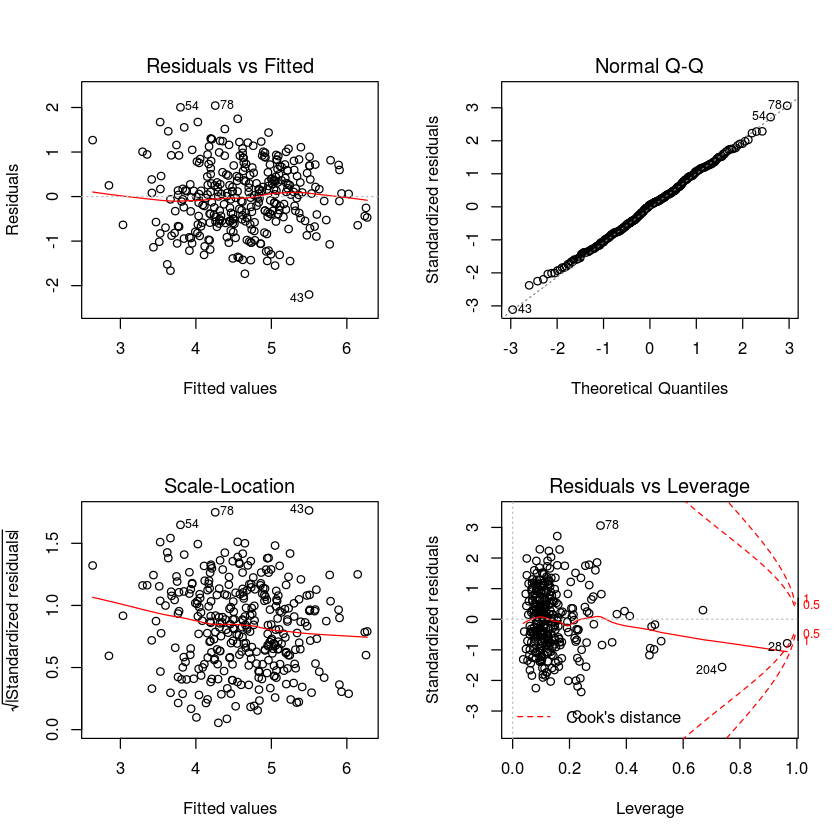

In [96]:
par(mfrow = c(2,2))
plot(baseline)

In [127]:
vif(baseline)[vif(baseline) > 10]

mean.conf.pitch        mean.spec.entropy           mean.num.apeak 
                11.20434                 10.28043                 11.86480 
          avg.voiced.seg  words_Conscientiousness words_nConscientiousness 
                11.01063                 23.38603                 22.92996

**Adjusted R-squared:** 0.3087. 

It may be a good idea to remove multi-collinear variables before backward selection (based on a p-threshold of < 0.3) as multicollinear variables may lead to inflated p-values.

Here, multicollinear variables are identified as those having a VIF > 10. Those variables are:

- **words_Conscientiousness**
- **words_nConscientiousness**
- mean.conf.pitch
- mean.spec.entropy
- mean.num.apeak
- avg.voiced.seg

Features with very high multicollinearity are bolded.

## Model 2
In model 2, we try to reduce multicollinearity as a precursor the backward selection. We do this by removing certain features.

In [148]:
model2 = update(baseline, ~. - words_Conscientiousness - mean.conf.pitch
                             - mean.spec.entropy - mean.num.apeak)

We removed **words_Conscientiousness**, **mean.conf.pitch**, **mean.spec.entropy** and **mean.num.apeak**. Now, no variables have a VIF of higher than 10.

In [149]:
summary(model2)


Call:
lm(formula = Extr ~ gender + mean.pitch + sd.pitch + sd.conf.pitch + 
    sd.spec.entropy + mean.val.apeak + sd.val.apeak + mean.loc.apeak + 
    sd.loc.apeak + sd.num.apeak + mean.energy + sd.energy + mean.d.energy + 
    sd.d.energy + avg.voiced.seg + avg.len.seg + time.speaking + 
    voice.rate + num.turns + hogv.entropy + hogv.median + hogv.cogR + 
    hogv.cogC + words_Extraversion + words_Neuroticism + words_Openness + 
    words_Agreeableness + words_nExtraversion + words_nNeuroticism + 
    words_nOpenness + words_nAgreeableness + words_nConscientiousness + 
    sentiment + anger + anticipation + disgust + fear + joy + 
    sadness + surprise + trust, data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.19454 -0.55714  0.01939  0.51084  2.09411 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               8.291e-01  1.362e+00   0.609 0.543276    
genderMale                4.058e-01  1.400e-01 

## Model 3
In model 3, we integrate **backward selection** by removing features with p-values higher than 0.3.

In [150]:
to_remove = ols_step_backward(model2)

We are eliminating variables based on p value...
No more variables satisfy the condition of prem: 0.3


These features had a p-value > 0.3. We therefore remove them from the regression.

- disgust
- words_nAgreeableness 
- words_nConscientiousness
- mean.val.apeak
- anger
- hogv.cogC
- sd.energy
- sd.pitch
- words_nExtraversion
- avg.voiced.seg
- anticipation
- sd.conf.pitch
- words_nOpenness
- words_Opennes
- words_nNeuroticism
- surprise
- sd.num.apeak
- sadness
- hogv.cogR
- hogv.median

In [151]:
paste(to_remove$removed, collapse = " - ")

[1] "disgust - words_nAgreeableness - words_nConscientiousness - mean.val.apeak - anger - hogv.cogC - sd.energy - sd.pitch - words_nExtraversion - avg.voiced.seg - anticipation - sd.conf.pitch - words_nOpenness - words_Openness - words_nNeuroticism - surprise - sd.num.apeak - sadness - hogv.cogR - hogv.median"

In [152]:
model3 = update(model2, ~. - disgust - words_nAgreeableness - words_nConscientiousness - mean.val.apeak 
                 - anger - hogv.cogC - sd.energy - sd.pitch - words_nExtraversion - avg.voiced.seg 
                 - anticipation - sd.conf.pitch - words_nOpenness - words_Openness - words_nNeuroticism
                 - surprise - sd.num.apeak - sadness - hogv.cogR - hogv.median)

In [154]:
summary(model3)


Call:
lm(formula = Extr ~ gender + mean.pitch + sd.spec.entropy + sd.val.apeak + 
    mean.loc.apeak + sd.loc.apeak + mean.energy + mean.d.energy + 
    sd.d.energy + avg.len.seg + time.speaking + voice.rate + 
    num.turns + hogv.entropy + words_Extraversion + words_Neuroticism + 
    words_Agreeableness + sentiment + fear + joy + trust, data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.99178 -0.52956  0.01224  0.54036  2.02376 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.050e+00  5.839e-01   1.799 0.073044 .  
genderMale           3.844e-01  1.191e-01   3.226 0.001392 ** 
mean.pitch           2.410e-03  9.488e-04   2.540 0.011590 *  
sd.spec.entropy     -1.153e+00  7.335e-01  -1.572 0.116967    
sd.val.apeak         3.192e+00  1.156e+00   2.760 0.006133 ** 
mean.loc.apeak       3.541e+01  7.403e+00   4.783 2.70e-06 ***
sd.loc.apeak        -7.668e-01  2.149e-01  -3.568 0.000418 ***
mean.energy 

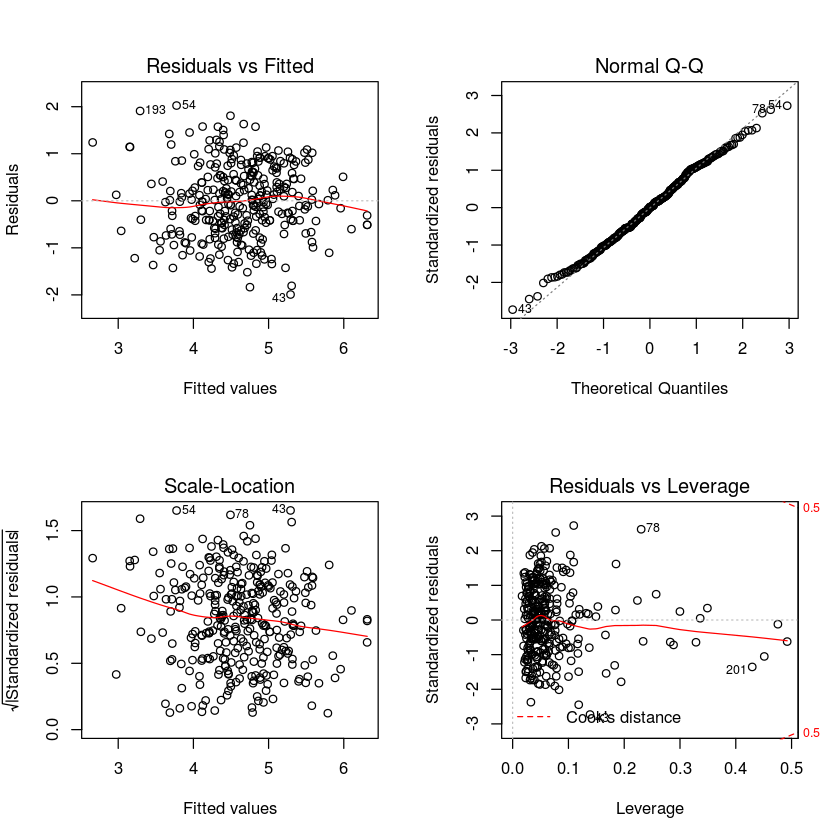

In [155]:
par(mfrow = c(2,2))
plot(model3)